In [1]:
from pathlib import Path

from src.loading import load_dataset_subset
from src.preprocessing import (
    clahe_bgr,
    smooth_median_bilateral,
    unsharp_mask,
    preproc_clahe_unsharp,
    preproc_smooth_unsharp,
    generate_preprocessed_dataset,
)

TRACKING_ROOT = Path.cwd()

MIXED_ROOT = TRACKING_ROOT / "DETRAC_mixed_50_50"
ARCHIVE_ROOT = TRACKING_ROOT / "archive"
PREPROC_ROOT = TRACKING_ROOT / "preproc_datasets"

print("MIXED_ROOT:", MIXED_ROOT)
print("ARCHIVE_ROOT:", ARCHIVE_ROOT)
print("PREPROC_ROOT:", PREPROC_ROOT)



MIXED_ROOT: c:\Users\bianc\Vision\tpf\tracking\DETRAC_mixed_50_50
ARCHIVE_ROOT: c:\Users\bianc\Vision\tpf\tracking\archive
PREPROC_ROOT: c:\Users\bianc\Vision\tpf\tracking\preproc_datasets


In [2]:
subset_mixed = load_dataset_subset(
    base_dir=MIXED_ROOT,
    split=None,
    images_subdir="images",
    labels_subdir="labels",
    percent=100.0,
    shuffle=False,
)
mixed_image_paths = subset_mixed["image_paths"]
mixed_label_paths = subset_mixed["label_paths"]

subset_archive = load_dataset_subset(
    base_dir=ARCHIVE_ROOT,
    split=None,
    images_subdir="images",
    labels_subdir="labels",
    percent=100.0,
    shuffle=False,
)
archive_image_paths = subset_archive["image_paths"]
archive_label_paths = subset_archive["label_paths"]

len(mixed_image_paths), len(archive_image_paths)


Total imágenes en all: 7290 | Usando: 7290 (100.0%)
Total imágenes en all: 1027 | Usando: 1027 (100.0%)


(7290, 1027)

In [3]:
preprocs = {
    "clahe": clahe_bgr,
    "smooth": smooth_median_bilateral,
    "unsharp": lambda img: unsharp_mask(img, amount=0.7),
    "clahe_unsharp": preproc_clahe_unsharp,
    "smooth_unsharp": preproc_smooth_unsharp,
}

preprocs


{'clahe': <function src.preprocessing.clahe_bgr(img_bgr: numpy.ndarray) -> numpy.ndarray>,
 'smooth': <function src.preprocessing.smooth_median_bilateral(img_bgr: numpy.ndarray) -> numpy.ndarray>,
 'unsharp': <function __main__.<lambda>(img)>,
 'clahe_unsharp': <function src.preprocessing.preproc_clahe_unsharp(img_bgr: numpy.ndarray) -> numpy.ndarray>,
 'smooth_unsharp': <function src.preprocessing.preproc_smooth_unsharp(img_bgr: numpy.ndarray) -> numpy.ndarray>}

In [5]:
mixed_outputs = {}

for name, fn in preprocs.items():
    out_dir = PREPROC_ROOT / f"mixed_{name}"
    print(f"\nMIXED -> {name} en {out_dir}")
    new_imgs, new_lbls = generate_preprocessed_dataset(
        image_paths=mixed_image_paths,
        label_paths=mixed_label_paths,
        output_base_dir=out_dir,
        preproc_fn=fn,
        suffix=name,
    )
    mixed_outputs[name] = {
        "images": new_imgs,
        "labels": new_lbls,
        "dir": out_dir,
    }

len(mixed_outputs)



MIXED -> clahe en c:\Users\bianc\Vision\tpf\tracking\preproc_datasets\mixed_clahe

MIXED -> smooth en c:\Users\bianc\Vision\tpf\tracking\preproc_datasets\mixed_smooth

MIXED -> unsharp en c:\Users\bianc\Vision\tpf\tracking\preproc_datasets\mixed_unsharp

MIXED -> clahe_unsharp en c:\Users\bianc\Vision\tpf\tracking\preproc_datasets\mixed_clahe_unsharp

MIXED -> smooth_unsharp en c:\Users\bianc\Vision\tpf\tracking\preproc_datasets\mixed_smooth_unsharp


5

Ejemplo MIXED: MVI_63554_img00745_dirty.jpg


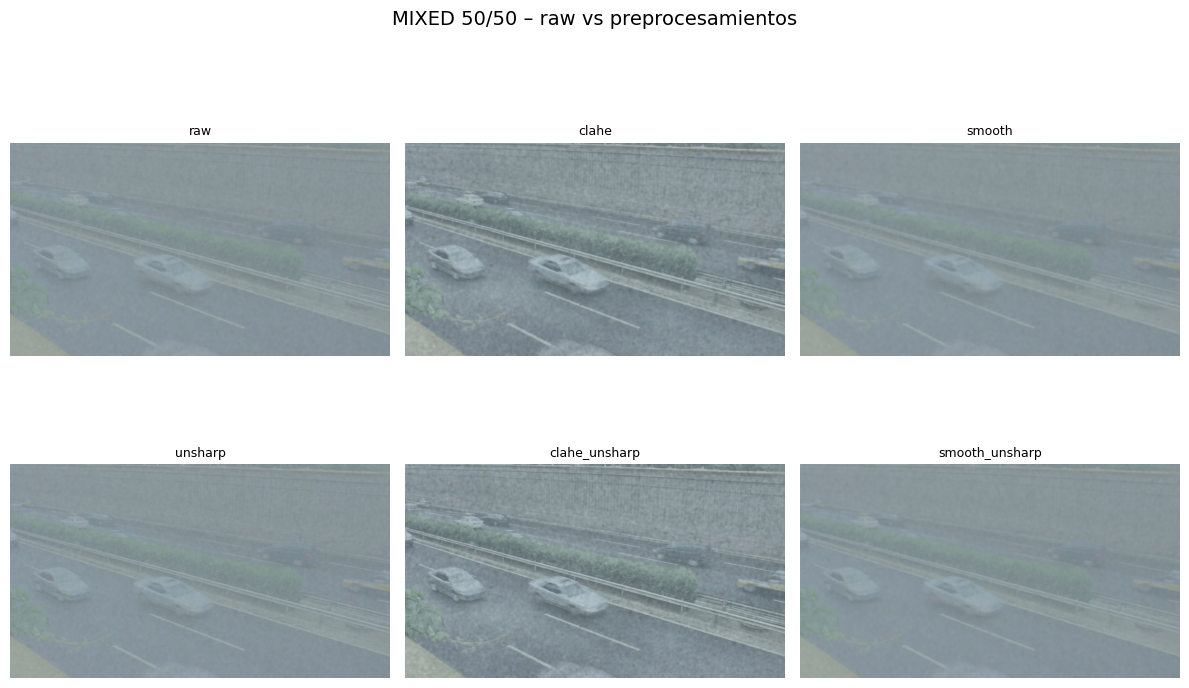

In [6]:
from src.visualization import show_preproc_panel
import random
sample_mixed = random.choice(mixed_image_paths)
print("Ejemplo MIXED:", sample_mixed.name)

show_preproc_panel(
    img_path=sample_mixed,
    preprocs_dict=preprocs,
    title_prefix="MIXED 50/50 – raw vs preprocesamientos",
)

In [ ]:
archive_outputs = {}

for name, fn in preprocs.items():
    out_dir = PREPROC_ROOT / f"archive_{name}"
    print(f"\nARCHIVE -> {name} en {out_dir}")
    new_imgs, new_lbls = generate_preprocessed_dataset(
        image_paths=archive_image_paths,
        label_paths=archive_label_paths,
        output_base_dir=out_dir,
        preproc_fn=fn,
        suffix=name,
    )
    archive_outputs[name] = {
        "images": new_imgs,
        "labels": new_lbls,
        "dir": out_dir,
    }

len(archive_outputs)


ARCHIVE -> clahe en c:\Users\bianc\Vision\tpf\tracking\preproc_datasets\archive_clahe

ARCHIVE -> smooth en c:\Users\bianc\Vision\tpf\tracking\preproc_datasets\archive_smooth

ARCHIVE -> unsharp en c:\Users\bianc\Vision\tpf\tracking\preproc_datasets\archive_unsharp

ARCHIVE -> clahe_unsharp en c:\Users\bianc\Vision\tpf\tracking\preproc_datasets\archive_clahe_unsharp

ARCHIVE -> smooth_unsharp en c:\Users\bianc\Vision\tpf\tracking\preproc_datasets\archive_smooth_unsharp


5

Ejemplo ARCHIVE: foggy-105.jpg


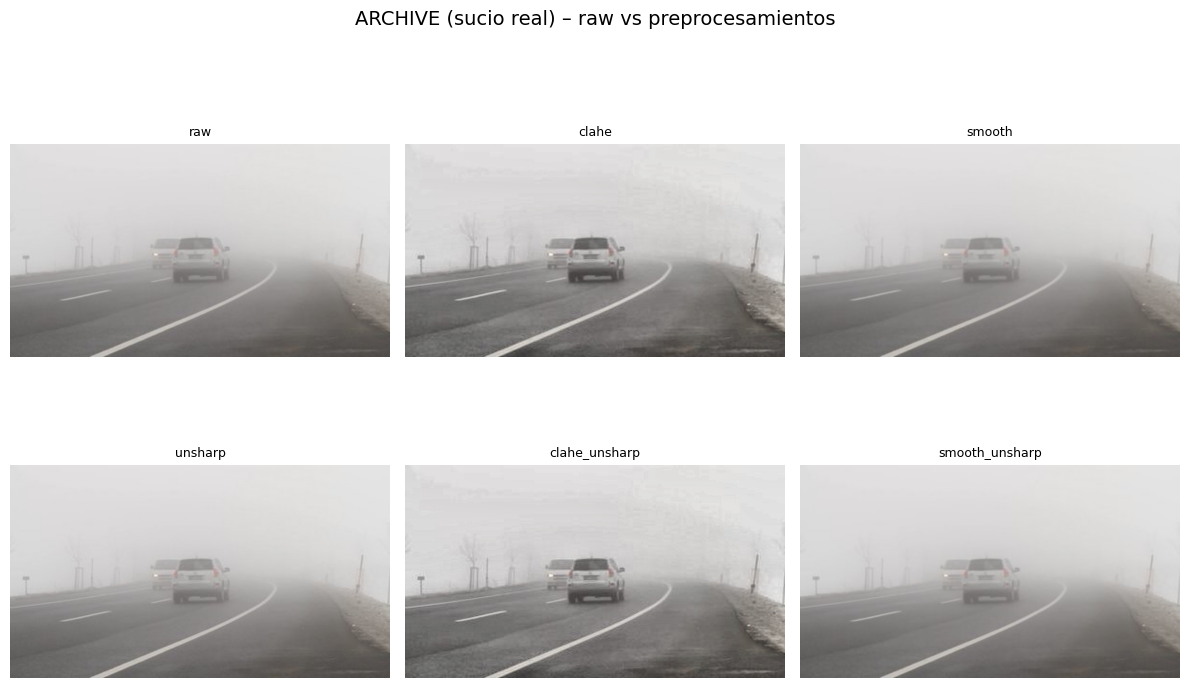

In [ ]:
sample_archive = random.choice(archive_image_paths)
print("Ejemplo ARCHIVE:", sample_archive.name)

show_preproc_panel(
    img_path=sample_archive,
    preprocs_dict=preprocs,
    title_prefix="ARCHIVE (sucio real) – raw vs preprocesamientos",
)